#Importing Libraries and Connecting to Drive

In [ ]:
import numpy as np
from numpy.random import randn

from scipy.signal import savgol_filter
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
from scipy.stats import pearsonr

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split

from scipy.signal import savgol_filter, find_peaks

import lightgbm as lgb
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


# Importing Mineral from Mica Library

In [ ]:
# # Mg-Carbonate
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_mg_carbonate.tab")

# # Mg-Smectite
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_mg_smectite.tab")

# # PHS
df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_poly_hyd_sulf.tab")

# # Low-Ca Pyroxene
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_lcp.tab")

# # Hydrated Silica
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_hydrated_silica.tab")

# # CO2 ice
# df = pd.read_csv(r"/content/drive/MyDrive/Data and Resources for Major Project/Mica_Library/data/crism_typespec_co2_ice.tab")

In [ ]:
df.columns =['Wavelength','Ratioed I/F Corrected','Ratioed I/F','Numerator I/F Corrected','Numerator I/F', 'Denominator I/F Corrected', 'Denominator I/F']

df_W = pd.read_csv("/content/drive/MyDrive/Data and Resources for Major Project/Labels Classified Data (CRISM)/Wavelength.csv")

df_WT = df_W.copy()

df_W = df_W.T
df_W.columns=['Wavelength']

In [ ]:
# Define the range of values to filter on
lower_range = 1.0210
upper_range = 2.6483

# Filter the data frame based on the value range
df_filtered = df[(df['Wavelength'] >= lower_range) & (df['Wavelength'] <= upper_range)]
df = df_filtered.drop(['Wavelength','Ratioed I/F','Numerator I/F Corrected','Numerator I/F', 'Denominator I/F Corrected', 'Denominator I/F'], axis=1)

# Print the filtered data frame
df = df.reset_index()['Ratioed I/F Corrected']
df_mica = pd.DataFrame(df)
df_mica

,Ratioed I/F Corrected
0,1.30724
1,1.30426
2,1.30665
3,1.31001
4,1.31389
...,...
235,1.22222
236,1.22072
237,1.21876
238,1.22040


#Importing the saved model

In [ ]:
epochs = 100
latent_dim = 10
samples = 200

In [ ]:
# # Mg-Carbonate
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Mg Carbonate (30)/generator_{epochs}.h5"

# # Mg-Smectite
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/MgSmectite (07)/generator_{epochs}.h5"

# # PHS
path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/PHS (19)/generator_{epochs}.h5"

# # Low-Ca Pyroxene
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Low-Ca Pyroxene (33)/generator_{epochs}.h5"

# # Hydrated Silica
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/Hydrated Silica (27)/generator_{epochs}.h5"

# # CO2 ice
# path_model = f"/content/drive/MyDrive/Data and Resources for Major Project/GAN_Models/CO2-ice (02)/generator_{epochs}.h5"

In [ ]:
model = load_model(path_model, compile=False)
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fb334595250>>

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):

    # generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

# generate images
latent_points = generate_latent_points(latent_dim, samples)

# generate images
X = model.predict(latent_points)

7/7 [==============================] - 8s 35ms/step


In [ ]:
mineral = X.reshape(samples, 240)
mineral.shape

(200, 240)

In [ ]:
df_mineral = pd.DataFrame(mineral)
df_mineral

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-0.982175,-0.982987,-0.983448,-0.983431,-0.984978,-0.985271,-0.985935,-0.985267,-0.983847,-0.982054,...,0.846972,0.827817,0.834274,0.842852,0.841670,0.813267,0.835055,0.852038,0.849569,0.839520
1,-0.984436,-0.984983,-0.985814,-0.985521,-0.987000,-0.987367,-0.987865,-0.987108,-0.986293,-0.984493,...,0.858887,0.843900,0.848747,0.857321,0.853307,0.825459,0.853336,0.860935,0.861026,0.851707
2,-0.990533,-0.990812,-0.991356,-0.991246,-0.992386,-0.992710,-0.993273,-0.992568,-0.991970,-0.990921,...,0.914617,0.902179,0.905360,0.909647,0.906439,0.880824,0.901256,0.906527,0.904698,0.893789
3,-0.987163,-0.987625,-0.988420,-0.988452,-0.989314,-0.989941,-0.990281,-0.989706,-0.988826,-0.987348,...,0.885934,0.869028,0.874766,0.879814,0.877861,0.848622,0.875479,0.882526,0.879840,0.871902
4,-0.966626,-0.967629,-0.968530,-0.968419,-0.970735,-0.971316,-0.971791,-0.970574,-0.968612,-0.965183,...,0.760737,0.738789,0.746686,0.757117,0.750730,0.721826,0.754222,0.776919,0.773552,0.763029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.910597,-0.912702,-0.914370,-0.914204,-0.918650,-0.919089,-0.920174,-0.917253,-0.913508,-0.907876,...,0.588513,0.560833,0.565927,0.578814,0.580547,0.551505,0.593629,0.621846,0.620457,0.610368
196,-0.984909,-0.985446,-0.986378,-0.986467,-0.987483,-0.988036,-0.988378,-0.987771,-0.986894,-0.984935,...,0.869319,0.855189,0.859844,0.864542,0.862248,0.832615,0.861088,0.872597,0.867481,0.859767
197,-0.984354,-0.984828,-0.985473,-0.985422,-0.986755,-0.987224,-0.987910,-0.987081,-0.985764,-0.984387,...,0.861281,0.843272,0.848812,0.857090,0.852978,0.825380,0.850247,0.861361,0.863961,0.853087
198,-0.983783,-0.984154,-0.985202,-0.984843,-0.986456,-0.986595,-0.987344,-0.986739,-0.985363,-0.983796,...,0.858985,0.842721,0.846451,0.852384,0.852135,0.821986,0.847781,0.862033,0.861019,0.849820


#Processing the Data


In [ ]:
def SG(df_sg_temp):
  #Column to filter value is the column value
  window_size = 11
  poly_order = 2
  df_sg_temp = savgol_filter(df_sg_temp, window_size, poly_order)
  return df_sg_temp

In [ ]:
#Function for Spike removal
def SR(sr_temp):
  window_size = 5
  threshold = 0.5

  windowCv = []
  windowMean = []

  for i in range(len(sr_temp)):
      if i<int(window_size/2):
          thisCv = np.std(sr_temp[:i+int(window_size/2)+1])/np.mean(sr_temp[:i+int(window_size/2)+1])
          thisMean = np.mean(sr_temp[:i+int(window_size/2)+1])

      elif len(sr_temp)-1-i<int(window_size/2):
          thisCv = np.std(sr_temp[i-int(window_size/2):])/np.mean(sr_temp[i-int(window_size/2):])
          thisMean = np.mean(sr_temp[i-int(window_size/2):])
  
      else:
          thisCv = np.std(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])/np.mean(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])
          thisMean = np.mean(sr_temp[i-int(window_size/2):i+int(window_size/2)+1])

      windowCv.append(thisCv)
      windowMean.append(thisMean)

  windowCv = np.array(windowCv)   
  windowMean = np.array(windowMean)
  cutoff = np.mean(windowCv) + threshold * (np.max(windowCv) - np.mean(windowCv))
  sr_temp_spectra = np.where(windowCv > cutoff, windowMean, sr_temp)

  return sr_temp_spectra

In [ ]:
def getStandardScaledSpectra(spectra):
    
    targetSpectra = spectra.reshape(-1,1)
    scaler = StandardScaler()
    targetSpectra = scaler.fit_transform(targetSpectra)
    targetSpectra = (targetSpectra.reshape(1,-1))[0]
    
    return targetSpectra

def getStandardScaledData(data, mask=None):
    
    if mask is None: 
      mask = np.full(data.shape, False).ravel()

    Ndata = np.ones(data.shape)
    
    for i in range(data.shape[0]):
        if mask[i]: 
          continue
        
        Ndata[i] = getStandardScaledSpectra(data[i])
        # spectra_standard[i] = getStandardScaledSpectra(data[i])
    
    return np.array(Ndata)

Calling the functions

Mica Library

In [ ]:
L = len(df_mica.columns)
df_mica

,Ratioed I/F Corrected
0,1.30724
1,1.30426
2,1.30665
3,1.31001
4,1.31389
...,...
235,1.22222
236,1.22072
237,1.21876
238,1.22040


In [ ]:
df_SG = df_mica.copy()

# Savitzky-Golay filter
df_SG['Ratioed I/F Corrected'] = SG(df_SG['Ratioed I/F Corrected'])

df_SG

,Ratioed I/F Corrected
0,1.305817
1,1.307108
2,1.308123
3,1.308862
4,1.309324
...,...
235,1.222317
236,1.221049
237,1.219691
238,1.218243


In [ ]:
df_spike = df_SG.copy()

# Spike Removal
for i in range(0, L):
  df_spike['Ratioed I/F Corrected'] = SR(df_spike['Ratioed I/F Corrected'].to_numpy())

df_spike

,Ratioed I/F Corrected
0,1.305817
1,1.307108
2,1.308123
3,1.308862
4,1.309324
...,...
235,1.222317
236,1.221049
237,1.219691
238,1.218243


In [ ]:
df_standardSpectra = df_spike.copy()

# Spectra Standardization
for i in range(0, L):
  df_standardSpectra['Ratioed I/F Corrected'] = getStandardScaledSpectra(df_spike['Ratioed I/F Corrected'].to_numpy())

In [ ]:
df_standardSpectra

,Ratioed I/F Corrected
0,1.091584
1,1.149524
2,1.195067
3,1.228213
4,1.248962
...,...
235,-2.655253
236,-2.712159
237,-2.773104
238,-2.838087


Generated Spectra

In [ ]:
# For minerals
for i in range (0, samples):
  df_mineral.iloc[i] = SG(df_mineral.iloc[i])
  df_mineral.iloc[i] = SR(df_mineral.iloc[i].to_numpy())
  df_mineral.iloc[i] = getStandardScaledSpectra(df_mineral.iloc[i].to_numpy())

In [ ]:
df_mineral

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,-1.277684,-1.279326,-1.280603,-1.281514,-1.282060,-1.282241,-1.282123,-1.281854,-1.280886,-1.279190,...,1.070944,1.069259,1.063744,1.059547,1.060804,1.061643,1.063933,1.067674,1.072866,1.079508
1,-1.269646,-1.271119,-1.272272,-1.273106,-1.273619,-1.273813,-1.273739,-1.273482,-1.272777,-1.271351,...,1.086743,1.083773,1.078022,1.074105,1.073865,1.074119,1.075927,1.079291,1.084210,1.090684
2,-1.264910,-1.265954,-1.266784,-1.267401,-1.267804,-1.267994,-1.268061,-1.267937,-1.267492,-1.266557,...,1.111464,1.108495,1.103054,1.098827,1.097406,1.095711,1.094770,1.094581,1.095146,1.096464
3,-1.268613,-1.269896,-1.270907,-1.271647,-1.272115,-1.272313,-1.272277,-1.272083,-1.271493,-1.270344,...,1.097699,1.094391,1.088258,1.084184,1.083500,1.082978,1.083699,1.085664,1.088871,1.093322
4,-1.300671,-1.303297,-1.305304,-1.306694,-1.307466,-1.307619,-1.307263,-1.306512,-1.304743,-1.301813,...,1.014034,1.012710,1.005327,1.001720,1.003898,1.006799,1.012162,1.019988,1.030275,1.043026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.349900,-1.355312,-1.359421,-1.362226,-1.363728,-1.363926,-1.362801,-1.361264,-1.357297,-1.351519,...,0.880257,0.879206,0.871877,0.869915,0.877232,0.885293,0.897287,0.913212,0.933069,0.956858
196,-1.271364,-1.272853,-1.274023,-1.274874,-1.275407,-1.275621,-1.275530,-1.275288,-1.274557,-1.273302,...,1.089970,1.087554,1.081623,1.077942,1.077700,1.077797,1.079270,1.082121,1.086347,1.091951
197,-1.273633,-1.275102,-1.276252,-1.277082,-1.277593,-1.277785,-1.277768,-1.277493,-1.276728,-1.275184,...,1.081303,1.078946,1.073233,1.068618,1.068875,1.069467,1.071653,1.075433,1.080806,1.087773
198,-1.273350,-1.274896,-1.276105,-1.276977,-1.277512,-1.277709,-1.277654,-1.277383,-1.276544,-1.275064,...,1.082646,1.080456,1.074597,1.070445,1.070782,1.071358,1.073492,1.077183,1.082432,1.089239


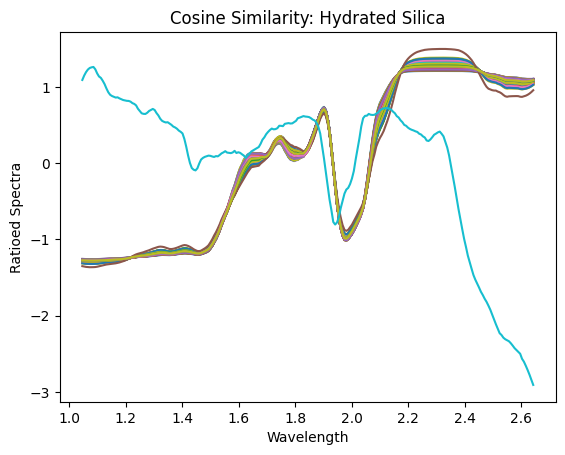

In [ ]:
# Mineral
for id in range(0, samples - 1):
  plt.plot(df_W['Wavelength'], df_mineral.T[id])

# Mica Library
plt.plot(df_W['Wavelength'], df_standardSpectra, label='Mica')
plt.xlabel('Wavelength')
plt.ylabel('Ratioed Spectra')
plt.title('Cosine Similarity: Hydrated Silica')

plt.show()

#Curve Matching Between mineral_smooth and Generated Values


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Creating an empty numpy array to store the similarities of values
np_similarity = np.array([])
np_similarity

# Define two curves as arrays of x and y values
curve1_x = np.array(df_WT.T)
curve1_y = np.array(df_standardSpectra)
curve2_x = np.array(df_WT.T)

# Note, apart from curve2_y, since other curves don't change, it's better to make predefine it to reduce the computaions needed

# Iterations
for i in range(0, samples):

  # Iterating over the samples
  y = pd.DataFrame(df_mineral.loc[i])

  # Defining the second curve's y values
  curve2_y = np.array(y)

  # Defining the 2 curves
  curve1 = list(zip(curve1_x, curve1_y))
  curve2 = list(zip(curve2_x, curve2_y))
  
  # Reducing the dimensions and reshaping
  curve1_arr =  np.array(curve1).reshape([240, 2])
  curve2_arr =  np.array(curve2).reshape([240, 2])  

  # Calculate the cosine similarity
  similarity = cosine_similarity(curve1_arr, curve2_arr)

  # Similarity Dataset
  np_similarity = np.append(np_similarity, similarity[0][1])  

In [ ]:
# Creating a dataframe
df_similarity = pd.DataFrame(np_similarity, columns = ['Similarity'])

df_similarity

,Similarity
0,-0.116938
1,-0.113799
2,-0.111811
3,-0.113329
4,-0.125964
...,...
195,-0.144839
196,-0.114465
197,-0.115326
198,-0.115247


In [ ]:
df_similarity.mean()

Similarity   -0.115736
dtype: float64

In [ ]:
y=1+df_similarity.mean()
y

Similarity    0.884264
dtype: float64

In [ ]:
df_similarity.std()

Similarity    0.005086
dtype: float64

#Plotting of Graphs

#Exporting Values into Drive

In [ ]:
# locmin.to_csv("/content/drive/MyDrive/Data and Resources for Major Project/Mica_Minimas/MgCo3_Min.csv",index=False)

In [ ]:
# df_standardSpectra=df_standardSpectra.T
# df_standardSpectra.to_csv("/content/drive/MyDrive/Data and Resources for Major Project/Pre_Processed_Minerals/Jarsosite_9_T.csv",index=False)